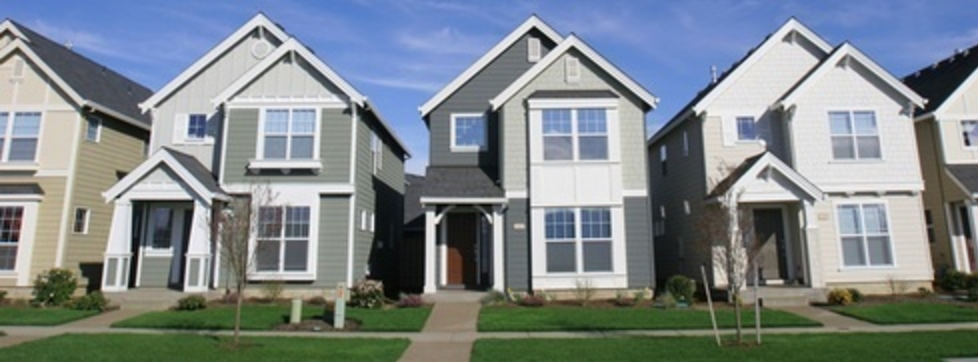

# Ames Housing Saleprice

## Problem Statement

Create a regression model where we are able to see what features affects the price of the house at sales the most.

## Executive Summary

### Contents:
- [7. Model_Benchmarks](#7.-Model-Benchmarks)
- [8. Model_Tuning](#8.-Model-Tuning)


Links:
[Kaggle challenge link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

# 7. Model Benchmarks

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('ggplot')
from IPython.display import display
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [2]:
!pip install mlxtend

In [3]:
from mlxtend.evaluate import bias_variance_decomp

In [4]:
# Importing cleaned dataset for Pre Processing
df_train= pd.read_csv('../datasets/train_preprocess.csv')

df_train.shape

(2000, 145)

## 7.1 Train Split Test

In [5]:
col_keys = df_train.drop(columns = ['Id','SalePrice']).keys()
col_keys

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       ...
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Garage Type_2Types', 'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd'], dtype='object', length=143)

In [6]:
y = df_train['SalePrice']
X = df_train[col_keys]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [8]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1600, 143)
X_test shape: (400, 143)
y_train shape: (1600,)
y_test shape: (400,)


## 7.1.1 Linear

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
print("Train Score(Lr): " + str(lr.score(X_train,y_train)))
print("Test Score(Lr): " + str(lr.score(X_test,y_test)))
print('Test Data Estimated score(Lr) ' + str(cross_val_score(lr, X_train, y_train, cv = 5).mean()))

Train Score(Lr): 0.9162790702805381
Test Score(Lr): -1.656116483659189e+20
Test Data Estimated score(Lr) -2.0003489366576996e+18


In [12]:
print("Train MSE(Lr) " + str(mean_squared_error(y_train, lr.predict(X_train))))
print('Test MSE(Lr) ' + str(mean_squared_error(y_test, lr.predict(X_test))))
                              
print('Test Data Estimated MSE(Lr) ' + str(-cross_val_score(lr, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean()))

Train MSE(Lr) 414068291.70875
Test MSE(Lr) 9.357740534742779e+29
Test Data Estimated MSE(Lr) 9.746627645364116e+27


### 7.1.1 comments 
- Terrible result, models is severely overfitted resulting in a negative r2 value
- Will use Ridge, Lasso and Elastic model to regularize data

## 7.1.2 Ridge

In [13]:
ridge = RidgeCV(alphas = np.linspace(0.1,10,100))

In [14]:
ridge.fit(X_train, y_train);

In [15]:
ridge.alpha_

4.3999999999999995

In [16]:
print("Train Score(L1): " + str(ridge.score(X_train,y_train)))
print("Test Score(L1): " + str(ridge.score(X_test,y_test)))
print('Test Data Estimated score(L1) ' + str(cross_val_score(ridge, X_train, y_train, cv = 5).mean()))

Train Score(L1): 0.9113905498496393
Test Score(L1): 0.9044929214042345
Test Data Estimated score(L1) 0.8928367737181062


In [17]:
print("Train RMSE(L1) " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Test RMSE(L1) ' + str(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L1) ' + str(np.sqrt(-cross_val_score(ridge, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L1) 20934.326188958545
Test RMSE(L1) 23230.461633721025
Test Data Estimated RMSE(L1) 22928.606776755143


Ridge model is producing better results

# 7.1.3 Lasso

In [18]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 1500)

In [19]:
lasso.fit(X_train, y_train);

In [20]:
lasso.alpha_

10.0

In [21]:
print("Train Score(L2): " + str(lasso.score(X_train,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train, y_train, cv = 5).mean()))

Train Score(L2): 0.9153517305050978
Test Score(L2): 0.9062978272144161
Test Data Estimated score(L2) 0.8913884113778971


In [22]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 20461.05430723239
Test RMSE(L2) 23009.90843479422
Test Data Estimated RMSE(L2) 23103.117915128732


# 7.1.4 Elastic Net

In [23]:
elasticnet = ElasticNetCV(alphas = np.linspace(0.1,10,100), max_iter = 1500)

In [24]:
elasticnet.fit(X_train, y_train);

In [25]:
elasticnet.alpha_

0.1

In [26]:
print("Train Score(EN): " + str(elasticnet.score(X_train,y_train)))
print("Test Score(EN): " + str(elasticnet.score(X_test,y_test)))
print('Test Data Estimated score(EN) ' + str(cross_val_score(elasticnet, X_train, y_train, cv = 5).mean()))

Train Score(EN): 0.896657078159605
Test Score(EN): 0.8953330980147445
Test Data Estimated score(EN) 0.8872988438991083


In [27]:
print("Train RMSE(EN) " + str(np.sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('Test RMSE(EN) ' + str(np.sqrt(mean_squared_error(y_test, elasticnet.predict(X_test)))))
                              
print('Test Data Estimated RMSE(EN) ' + str(np.sqrt(-cross_val_score(elasticnet, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(EN) 22607.853704597008
Test RMSE(EN) 24318.945786517976
Test Data Estimated RMSE(EN) 23499.72455997242


- Slight differences from the 3 models
- Lasso does slightly better for its scoring
- will use Lasso model to eliminate features

# 8 Model Tuning

In [28]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.sort_values(ascending = False, inplace = True)
coef[coef > 0]

Neighborhood_GrnHill     1.244237e+05
Condition 2_PosN         5.360308e+04
Condition 2_PosA         5.194020e+04
Neighborhood_NridgHt     4.015792e+04
Neighborhood_StoneBr     2.948593e+04
Neighborhood_NoRidge     2.634406e+04
Heating_Wall             2.532950e+04
Neighborhood_Veenker     2.444309e+04
MS Zoning_I (all)        2.089903e+04
Gr Liv Area              1.930911e+04
Neighborhood_BrDale      1.923414e+04
Land Contour_HLS         1.744375e+04
Neighborhood_Crawfor     1.668026e+04
Bldg Type_1Fam           1.445111e+04
Condition 1_PosN         1.413911e+04
Bldg Type_2fmCon         1.394444e+04
Exterior 1st_CemntBd     1.384595e+04
Land Contour_Low         1.375287e+04
Neighborhood_Blmngtn     1.332419e+04
Condition 1_PosA         1.296668e+04
Exterior 1st_BrkFace     1.256551e+04
Neighborhood_NPkVill     1.193299e+04
Neighborhood_ClearCr     1.163258e+04
Neighborhood_Greens      1.142632e+04
Fireplace Total Value    1.082235e+04
Neighborhood_Landmrk     9.710601e+03
House Style_

In [29]:
gd_coef = coef[:50].keys()
len(gd_coef) #keeping values with high coef

50

In [30]:
X_train_filtered = X_train[gd_coef]
X_test_filtered = X_test[gd_coef]

In [31]:
lr = LinearRegression()
lr.fit(X_train_filtered, y_train)

LinearRegression()

In [32]:
print("Train Score(Lr): " + str(lr.score(X_train_filtered,y_train)))
print("Test Score(Lr): " + str(lr.score(X_test_filtered,y_test)))
print('Test Data Estimated score(Lr) ' + str(cross_val_score(lr, X_train_filtered, y_train, cv = 5).mean()))

Train Score(Lr): 0.9051945684046373
Test Score(Lr): 0.8983743049077554
Test Data Estimated score(Lr) 0.8895837676567673


In [33]:
print("Train RMSE(Lr) " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_filtered)))))
print('Test RMSE(Lr) ' + str(np.sqrt(mean_squared_error(y_test, lr.predict(X_test_filtered)))))
                              
print('Test Data Estimated RMSE(Lr) ' + str(np.sqrt(-cross_val_score(lr, X_train_filtered, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(Lr) 21653.872529446726
Test RMSE(Lr) 23963.035118576423
Test Data Estimated RMSE(Lr) 23321.285693780937


- Tried with 25, 30, 40, 50, 55 features for test, 50 features returns the best results
- Still not doing well on cross validation
- Trying with Lasso model

In [34]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 1500)

In [35]:
lasso.fit(X_train_filtered, y_train);

In [36]:
lasso.alpha_

10.0

In [37]:
print("Train Score(L2): " + str(lasso.score(X_train_filtered,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test_filtered,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train_filtered, y_train, cv = 5).mean()))

Train Score(L2): 0.904942021223315
Test Score(L2): 0.8997236028801581
Test Data Estimated score(L2) 0.8899911045705029


In [38]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_filtered)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_filtered)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train_filtered, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 21682.694651385096
Test RMSE(L2) 23803.423337251643
Test Data Estimated RMSE(L2) 23275.77494445164


# 8.1 Further Model tuning

- Polynomial features, try to reduce RMSE
- try to remove more values, reducing variance

In [39]:
coef_sort = [i for i in (gd_coef.sort_values())] # creating list in alphabetical order to see relationship
coef_sort

['1st Flr SF',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 2_Feedr',
 'Condition 2_PosA',
 'Condition 2_PosN',
 'Exter Qual',
 'Exterior 1st_AsbShng',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_VinylSd',
 'Fireplace Total Value',
 'Garage Area',
 'Garage Cars',
 'Gr Liv Area',
 'Heating_Wall',
 'House Style_2.5Unf',
 'House Style_SFoyer',
 'Kitchen Qual',
 'Land Contour_HLS',
 'Land Contour_Low',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'Mas Vnr Area',
 'Neighborhood_Blmngtn',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 

In [40]:
coef[:10] #checking top 10 highest coef

Neighborhood_GrnHill    124423.701438
Condition 2_PosN         53603.079991
Condition 2_PosA         51940.204732
Neighborhood_NridgHt     40157.920210
Neighborhood_StoneBr     29485.933637
Neighborhood_NoRidge     26344.063704
Heating_Wall             25329.501327
Neighborhood_Veenker     24443.085044
MS Zoning_I (all)        20899.026855
Gr Liv Area              19309.112947
dtype: float64

From the list above, some Categories can be seen. 
- Building type, 1Fam and 2Fmcon(single family or 2 family conversion)
- Condition 1 and 2, PosA and PosN(Adjecent or near to Positive off site feature -- park, greenbelt)
- Exterior covering of house
- Fireplace
- Garage
- Gr Liv Area: Above ground living area
- Heating
- House Style
- Kitchen Qual
- Land Contour:
- Lot Config
- Mas Vnr Area
- Neighbourhood
- Overall Quality
- Roof Matl: Roof material, Membran or Wood shingles
- Total Basement Square Feet: Total Bsmt SF
- Year Built

Top 10 coef includes:
- Neighborhood
- Roof Material
- Condition
- Heating Wall furnance
- Ground living area

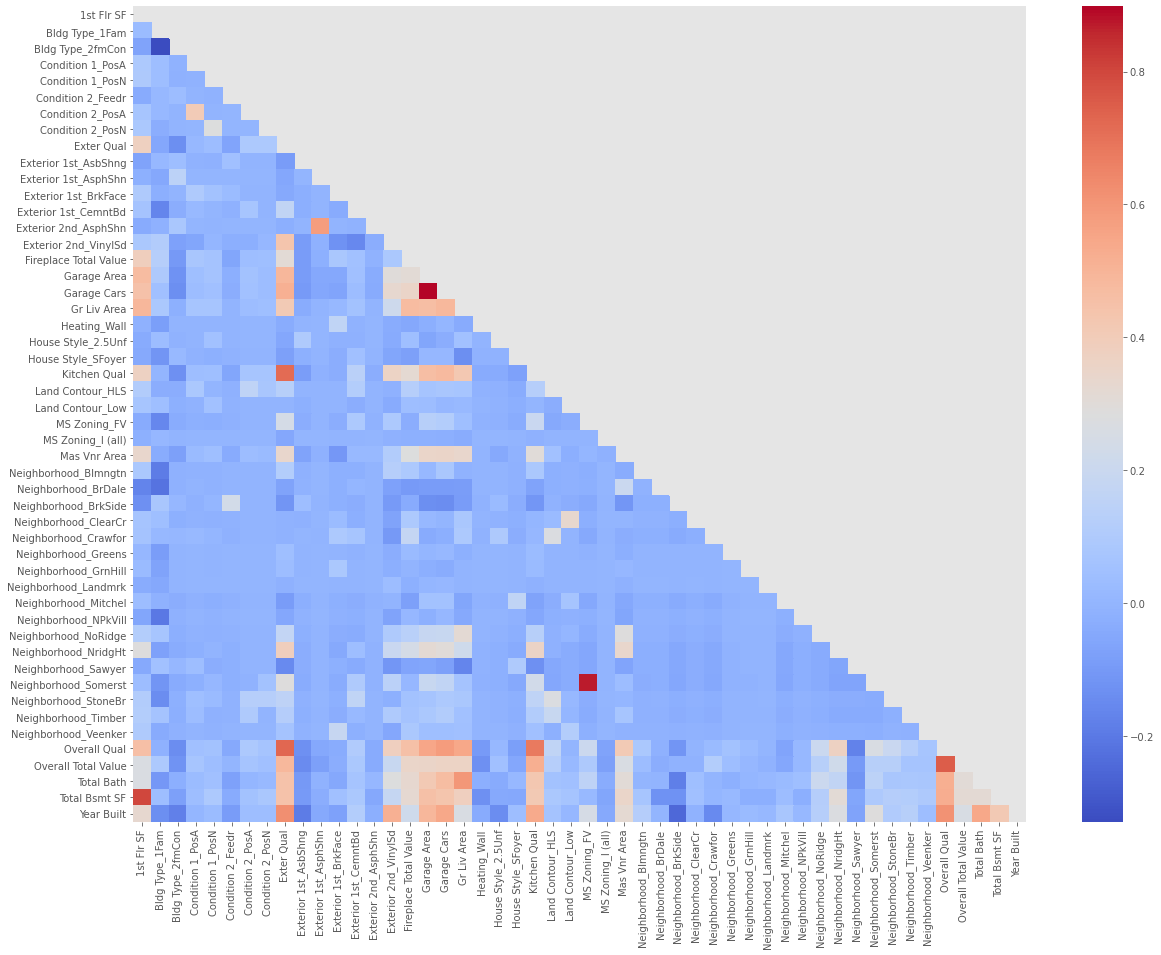

In [41]:
plt.figure(figsize= (20, 15))
mask = (np.triu(np.ones_like(df_train[coef_sort].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[coef_sort].corr(),
            annot=False, mask = mask, 
            fmt='.1g', cmap='coolwarm');

Very few patches of data with Correlation to each other, will plot out small heatmap to see

# 8.2 PolynomialFeatures

## 8.2.1 Garage related features with high coef

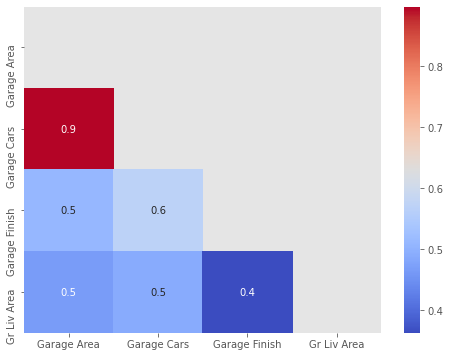

In [42]:
garage_coef = ['Garage Area','Garage Cars', 
               'Garage Finish', 'Gr Liv Area']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[garage_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[garage_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm');

In [43]:
y = df_train['SalePrice']
X = df_train[garage_coef]

In [44]:
print("Garage Features Train Score(L2): " + str(cross_val_score(lasso, X = X, y = y, cv = 5).mean()))

Garage Features Train Score(L2): 0.6733302383656583


In [45]:
poly = PolynomialFeatures(include_bias=False)

In [46]:
X_poly = poly.fit_transform(X)

In [47]:
pd.DataFrame(X_poly, columns=poly.get_feature_names(garage_coef));

In [48]:
print("Polynomial Garage Features Train Score(L2): " + str(cross_val_score(lasso, X_poly, y, cv=5).mean()))

Polynomial Garage Features Train Score(L2): 0.7331335961592048


### 8.2.1 comments
r2 score improved, will keep values for model tuning

## 8.2.1 Garage and Overall features

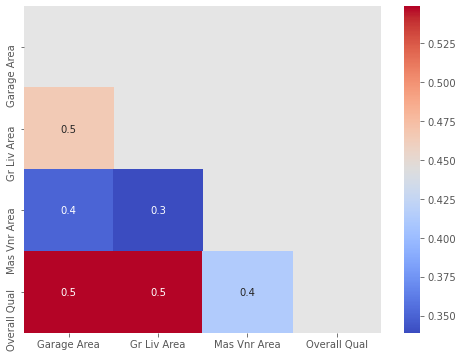

In [49]:
ovr_gar_coef = ['Garage Area','Gr Liv Area','Mas Vnr Area',
             'Overall Qual']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[ovr_gar_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[ovr_gar_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm');

In [50]:
y = df_train['SalePrice']
X = df_train[ovr_gar_coef]

In [51]:
print("Garage & Overall Features Train Score(L2): " + str(cross_val_score(lasso, X = X, y = y, cv = 5).mean()))

Garage & Overall Features Train Score(L2): 0.791635119525387


In [52]:
poly = PolynomialFeatures(include_bias=False)

In [53]:
X_poly = poly.fit_transform(X)

In [54]:
print("Polynomial Garage & Overall Features Train Score(L2): " + str(cross_val_score(lasso, X_poly, y, cv=5).mean()))

Polynomial Garage & Overall Features Train Score(L2): 0.834638063364158


### 8.2.2 comments
r2 score improved, will keep values for model tuning

# 8.2.3 Garage and Total and Year Features

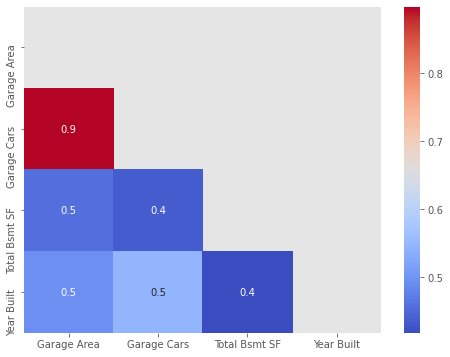

In [55]:
gar_yr_sf_coef = ['Garage Area','Garage Cars',
                  'Total Bsmt SF','Year Built']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[gar_yr_sf_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[gar_yr_sf_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm');

In [56]:
y = df_train['SalePrice']
X = df_train[gar_yr_sf_coef]

In [57]:
print("Garage & Total & Year Features Train Score(L2): " + str(cross_val_score(lasso, X = X, y = y, cv = 5).mean()))

Garage & Total & Year Features Train Score(L2): 0.6357364148887036


In [58]:
poly = PolynomialFeatures(include_bias=False)

In [59]:
X_poly = poly.fit_transform(X)

In [60]:
print("Polynomial Garage & Total & Year Features Train Score(L2): " + str(cross_val_score(lasso, X_poly, y, cv=5).mean()))

Polynomial Garage & Total & Year Features Train Score(L2): 0.694911653497955


### 8.2.3 comments
r2 score improved, will keep values for model tuning

##  8.2.4 Adding in relevant Polynomial features to training and testing dataset

### 8.2.4 Creating Polynomial Features

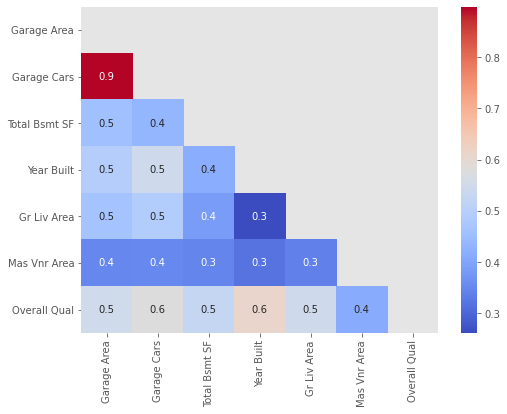

In [61]:
poly_coef = ['Garage Area','Garage Cars',
             'Total Bsmt SF','Year Built','Gr Liv Area',
             'Mas Vnr Area','Overall Qual']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[poly_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[poly_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm');

In [62]:
y = df_train['SalePrice']
X = df_train[poly_coef]

In [63]:
print("Garage & Total & Year Features Train Score(L2): " + str(cross_val_score(lasso, X = X, y = y, cv = 5).mean()))

Garage & Total & Year Features Train Score(L2): 0.8307095332235763


In [64]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias=False)

In [65]:
X_poly = poly.fit_transform(X)

In [66]:
print("Polynomial Garage & Total & Year Features Train Score(L2): " + str(cross_val_score(lasso, X_poly, y, cv=5).mean()))

Polynomial Garage & Total & Year Features Train Score(L2): 0.8740312784562139


### 8.2.4 adding into training dataset

In [67]:
poly_features = pd.DataFrame(X_poly, columns=poly.get_feature_names(poly_coef))
poly_features.drop(poly_coef, axis = 1, inplace = True)
poly_features.shape

(2000, 21)

In [68]:
poly_features.columns

Index(['Garage Area Garage Cars', 'Garage Area Total Bsmt SF', 'Garage Area Year Built', 'Garage Area Gr Liv Area', 'Garage Area Mas Vnr Area', 'Garage Area Overall Qual', 'Garage Cars Total Bsmt SF', 'Garage Cars Year Built', 'Garage Cars Gr Liv Area', 'Garage Cars Mas Vnr Area', 'Garage Cars Overall Qual', 'Total Bsmt SF Year Built', 'Total Bsmt SF Gr Liv Area', 'Total Bsmt SF Mas Vnr Area', 'Total Bsmt SF Overall Qual', 'Year Built Gr Liv Area', 'Year Built Mas Vnr Area', 'Year Built Overall Qual', 'Gr Liv Area Mas Vnr Area', 'Gr Liv Area Overall Qual', 'Mas Vnr Area Overall Qual'], dtype='object')

In [69]:
df_train_poly = pd.concat([df_train, poly_features], axis = 1)
df_train_poly.shape

(2000, 166)

# 8.3 Testing Polynomial features with Lasso

In [70]:
col_keys = df_train_poly.drop(columns = ['Id','SalePrice']).keys()
col_keys

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       ...
       'Total Bsmt SF Year Built', 'Total Bsmt SF Gr Liv Area', 'Total Bsmt SF Mas Vnr Area', 'Total Bsmt SF Overall Qual', 'Year Built Gr Liv Area', 'Year Built Mas Vnr Area', 'Year Built Overall Qual', 'Gr Liv Area Mas Vnr Area', 'Gr Liv Area Overall Qual', 'Mas Vnr Area Overall Qual'], dtype='object', length=164)

In [71]:
y = df_train_poly['SalePrice']
X = df_train_poly[col_keys]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [73]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1600, 164)
X_test shape: (400, 164)
y_train shape: (1600,)
y_test shape: (400,)


In [74]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 5000)
lasso.fit(X_train, y_train);
lasso.alpha_

10.0

In [75]:
print("Train Score(L2): " + str(lasso.score(X_train,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train, y_train, cv = 5).mean()))

Train Score(L2): 0.9326445882310574
Test Score(L2): 0.9315783465700817
Test Data Estimated score(L2) 0.9115369208871558


In [76]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 18251.779515643368
Test RMSE(L2) 19662.414271681577
Test Data Estimated RMSE(L2) 20821.12976111137


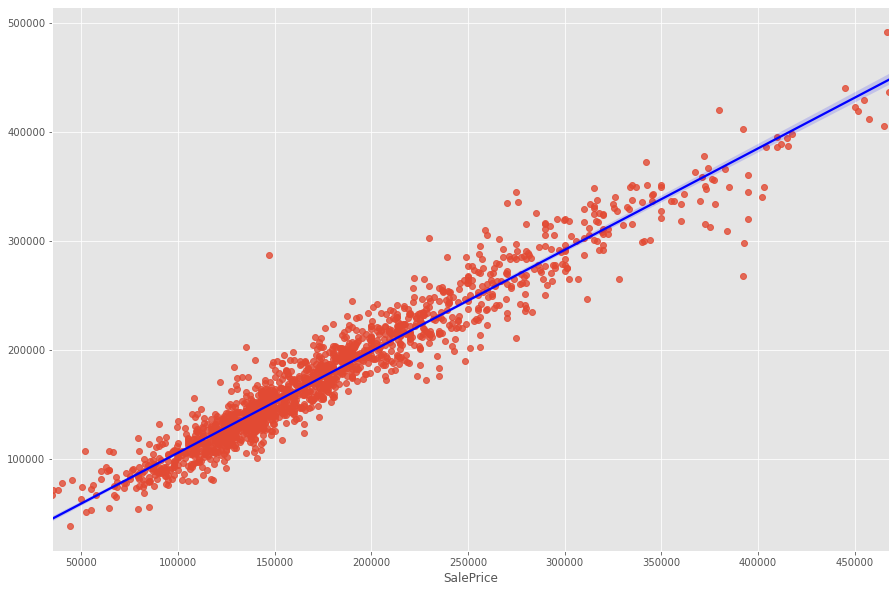

In [77]:
plt.figure(figsize=(15,10))
sns.regplot(x = y_train, y = lasso.predict(X_train), line_kws = {'color':'b'});

### 8.3 comments :
- Results improved after inserting polynomial features

# 8.4  Lasso and Ridge Model after removing low coef columns

- filtering out top coefficients features

In [78]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.sort_values(ascending = False, inplace = True) # sort value by importance of value

In [79]:
coef_sort = [i for i in (coef[:95].keys().sort_values())] # creating list in alphabetical order to see relationship

## 8.4.1 Lasso model

In [80]:
y = df_train_poly['SalePrice']
X = df_train_poly[coef_sort]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [82]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1600, 95)
X_test shape: (400, 95)
y_train shape: (1600,)
y_test shape: (400,)


In [83]:
re_lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 3000)
re_lasso.fit(X_train, y_train);
re_lasso.alpha_

10.0

In [84]:
print("Train Score(L2): " + str(re_lasso.score(X_train,y_train)))
print("Test Score(L2): " + str(re_lasso.score(X_test,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(re_lasso, X_train, y_train, cv = 5).mean()))

Train Score(L2): 0.9278132790466173
Test Score(L2): 0.929590305427505
Test Data Estimated score(L2) 0.9129476422237323


In [85]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, re_lasso.predict(X_train)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, re_lasso.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(re_lasso, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 18895.031634838982
Test RMSE(L2) 19946.021824370484
Test Data Estimated RMSE(L2) 20662.158528247033


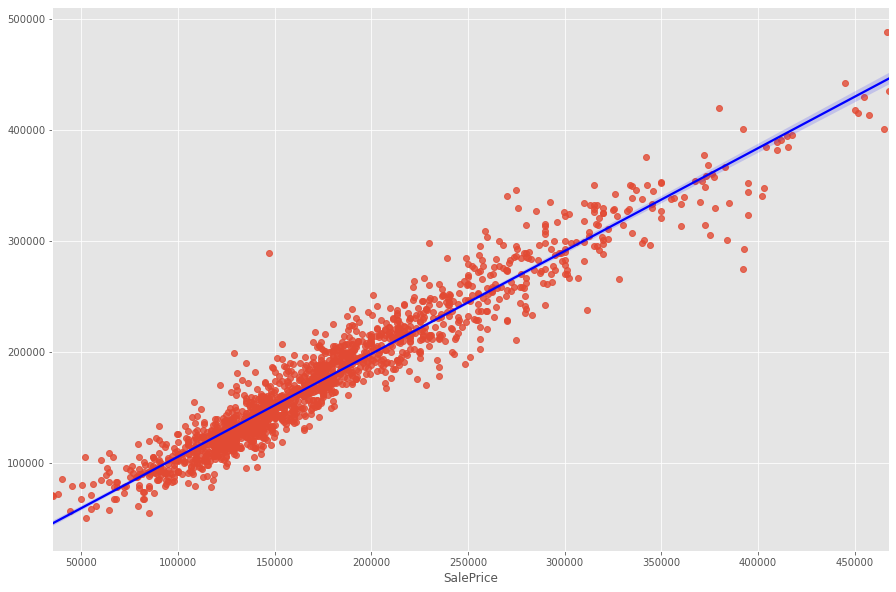

In [86]:
plt.figure(figsize=(15,10))
sns.regplot(x = y_train, y = re_lasso.predict(X_train), line_kws = {'color':'b'});

## 8.4.2 Ridge Model

In [87]:
re_ridge = RidgeCV(alphas = np.linspace(0.1,10,100))

In [88]:
re_ridge.fit(X_train, y_train);

In [89]:
re_ridge.alpha_

2.8000000000000003

In [90]:
print("Train Score(L1): " + str(re_ridge.score(X_train,y_train)))
print("Test Score(L1): " + str(re_ridge.score(X_test,y_test)))
print('Test Data Estimated score(L1) ' + str(cross_val_score(re_ridge, X_train, y_train, cv = 5).mean()))

Train Score(L1): 0.9261001014882769
Test Score(L1): 0.9268975752390181
Test Data Estimated score(L1) 0.9134835938218556


In [91]:
print("Train RMSE(L1) " + str(np.sqrt(mean_squared_error(y_train, re_ridge.predict(X_train)))))
print('Test RMSE(L1) ' + str(np.sqrt(mean_squared_error(y_test, re_ridge.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L1) ' + str(np.sqrt(-cross_val_score(re_ridge, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L1) 19117.930876786675
Test RMSE(L1) 20323.848595221923
Test Data Estimated RMSE(L1) 20579.62836728632


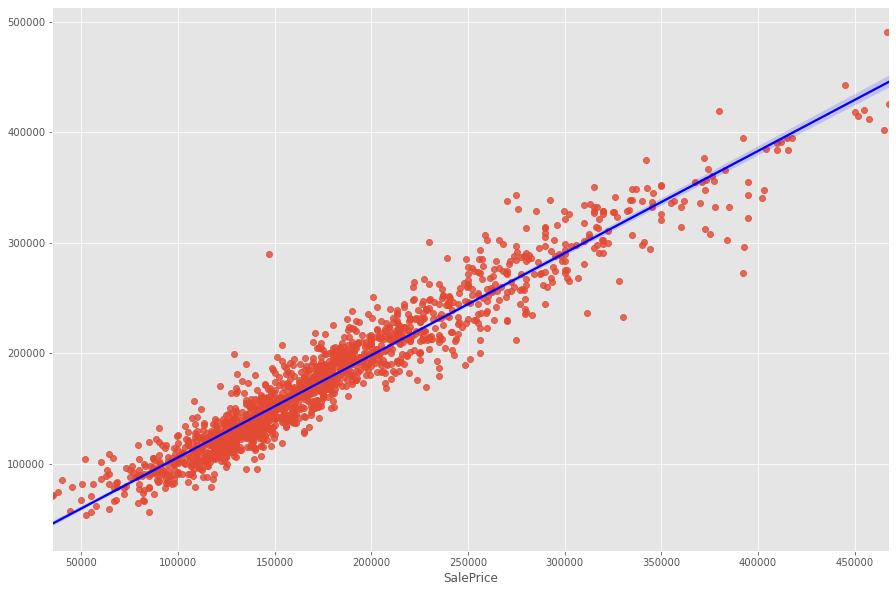

In [92]:
plt.figure(figsize=(15,10))
sns.regplot(x = y_train, y = re_ridge.predict(X_train), line_kws = {'color':'b'});

# 8.4 comments
- Results between Ridge and Lasso models do not differ much

# Kaggle Submission

- will submit final prediction of lasso and ridge models to Kaggle

# Preparing Test Data

In [93]:
# importing data for unknown test data prediction
df_test= pd.read_csv('../datasets/test_preprocess.csv')

df_test.shape

(879, 138)

In [94]:
# in test - train
df_test_col = df_test.columns.difference(df_train.columns)

# in train not in test
df_train_col =  df_train.columns.difference(df_test.columns)

# dropping values not in training set
df_test.drop(columns = df_test_col, inplace = True)

# adding values in training set not in testing set
for i in df_train_col:
    df_test[i] = 0
    
#filling in possible null values
df_test.fillna(0 ,inplace = True)


#Creating Polynomial Features for unknown data
X_df_test = df_test[poly_coef]
X_test_poly = poly.fit_transform(X_df_test)

#Creating Polynomial Dataframe to add into test data
poly_test_features = pd.DataFrame(X_test_poly, columns=poly.get_feature_names(poly_coef))
poly_test_features.drop(poly_coef, axis = 1, inplace = True)

#adding features together for prediction models
df_test_poly = pd.concat([df_test, poly_test_features], axis = 1)


# Predicting Saleprice of unknown test data

In [95]:
X_df_test = df_test_poly[coef_sort]

In [96]:
lasso_test_predict = re_lasso.predict(X_df_test)
ridge_test_predict = re_ridge.predict(X_df_test)

In [97]:
print(len(lasso_test_predict))
print(len(ridge_test_predict))

879
879


In [98]:
df_lasso_predicted = pd.DataFrame(lasso_test_predict, columns = ['SalePrice'])
df_ridge_predicted = pd.DataFrame(ridge_test_predict, columns = ['SalePrice'])

In [99]:
print(df_lasso_predicted.head())
print(df_ridge_predicted.head())

       SalePrice
0  134501.044930
1  165382.699562
2  194473.922661
3  110501.835088
4  174572.935437
       SalePrice
0  132867.086074
1  165802.658567
2  194495.570818
3  111446.722168
4  174997.762788


In [100]:
submit_lasso = pd.concat([df_test['Id'], df_lasso_predicted['SalePrice']], 
                   ignore_index=False, sort=False, axis = 1)

submit_ridge = pd.concat([df_test['Id'], df_ridge_predicted['SalePrice']], 
                   ignore_index=False, sort=False, axis = 1)


In [101]:
submit_lasso.sort_values('Id', ascending = True, inplace = True)
submit_lasso.head()

,Id,SalePrice
704,2,98750.672009
706,4,279645.475088
120,6,190499.058607
312,7,225021.279090
401,17,191615.612361


In [102]:
submit_ridge.sort_values('Id', ascending = True, inplace = True)
submit_ridge.head()

,Id,SalePrice
704,2,98655.569053
706,4,280653.522379
120,6,190390.082529
312,7,224085.140756
401,17,192191.486695


In [103]:
submit_lasso.to_csv("../datasets/submission_lasso.csv", index=False)
submit_ridge.to_csv("../datasets/submission_ridge.csv", index=False)

# Submission result

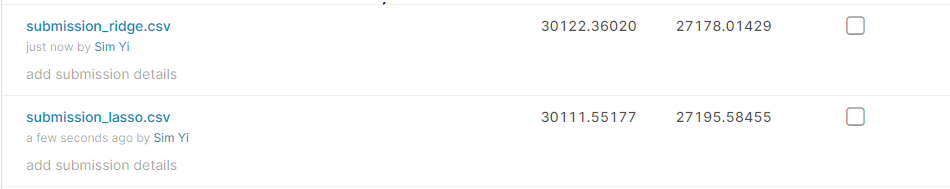

# 9. Analysis

In [104]:
positive_features = coef[coef > 0].sort_values(ascending = False)

In [105]:
coef_list = [i for i in (positive_features.keys().sort_values())] # creating list in alphabetical order to see relationship
coef_list

['1st Flr SF',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bsmt Qual',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 1_RRNe',
 'Condition 2_Feedr',
 'Condition 2_PosA',
 'Condition 2_PosN',
 'Exter Qual',
 'Exterior 1st_AsbShng',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_Stone',
 'Exterior 1st_Stucco',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_HdBoard',
 'Exterior 2nd_VinylSd',
 'Fireplace Total Value',
 'Garage Area',
 'Garage Area Garage Cars',
 'Garage Area Overall Qual',
 'Garage Area Year Built',
 'Garage Cars',
 'Garage Cars Gr Liv Area',
 'Garage Cars Mas Vnr Area',
 'Garage Cars Total Bsmt SF',
 'Garage Finish',
 'Garage Total Value',
 'Gr Liv Area',
 'Gr Liv Area Mas Vnr Area',
 'Gr Liv Area Overall Qual',
 'Heating_GasA',
 'Heating_Wall',
 'House Style_1.5Unf',
 'House Style_2.5Unf',
 'House Style_SFoyer',
 'Kitchen Qual',
 'Land Contour_HLS',
 'Land Contour_Low',
 'MS Zoning_FV',
 'MS Zoning_RL',
 'Mas Vnr Area',
 'Mas Vnr Area

In [106]:
coef[coef > 0][:30] #looking at which features affect saleprice the most

Neighborhood_GrnHill          112289.084786
Condition 2_PosN               26424.386056
Neighborhood_StoneBr           21292.449327
Gr Liv Area                    21280.475982
Neighborhood_Crawfor           20158.839278
Neighborhood_NridgHt           18456.709146
MS Zoning_FV                   18324.242063
Condition 2_PosA               17436.707801
Neighborhood_BrDale            16909.795965
Neighborhood_Veenker           16823.487773
Condition 1_PosA               16303.417471
Neighborhood_ClearCr           14749.770522
Fireplace Total Value          11688.047475
Exterior 1st_BrkFace           11613.646895
Land Contour_Low               11497.235858
Condition 1_PosN               11444.787564
Land Contour_HLS               10647.730635
Overall Total Value             9781.991235
Bldg Type_1Fam                  9209.811989
Neighborhood_Greens             8925.945230
Year Built                      8881.789523
Total Bath                      8685.526468
Total Bsmt SF                   

# 9 comments 
- From a glance, it looks like the location where the house is built matters the most for saleprice
  - Greenhill, Northridge Heights and Crawford seems to affect salesprice the most
  - Condition of the house (Proximity to main road or railroad), where it is near to main and railroad on both conditions seems to improve saleprice
  
- Above grade (ground) living area square feet matters too, as bigger the living area the higher the price
- Having a Garage improves Saleprice
- Building type: 1Fam Single-family Detached, 2FmCon Two-family Conversion improved saleprice
- Total Bsmt SF, the more basement space the better!


In [ ]:
def Diff(li1, li2): 
    return (list(set(li1) - set(li2)))

In [107]:
coef_list[:] = [x for x in coef_list if 'Neigh' not in x]

In [108]:
coef_list[:] = [x for x in coef_list if 'Condition' not in x]

In [118]:
coef_list[:] = [x for x in coef_list if 'Land' not in x]

In [119]:
sorted(Diff(coef_list,poly_test_features.columns))

['1st Flr SF',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bsmt Qual',
 'Exter Qual',
 'Exterior 1st_AsbShng',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_Stone',
 'Exterior 1st_Stucco',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_HdBoard',
 'Exterior 2nd_VinylSd',
 'Fireplace Total Value',
 'Garage Area',
 'Garage Cars',
 'Garage Finish',
 'Garage Total Value',
 'Gr Liv Area',
 'Heating_GasA',
 'Heating_Wall',
 'House Style_1.5Unf',
 'House Style_2.5Unf',
 'House Style_SFoyer',
 'Kitchen Qual',
 'MS Zoning_FV',
 'MS Zoning_RL',
 'Mas Vnr Area',
 'Overall Qual',
 'Overall Total Value',
 'Roof Style_Flat',
 'Roof Style_Hip',
 'Street_Pave',
 'Total Bath',
 'Total Bsmt SF',
 'Total Flr SF',
 'Year Built',
 'Year Remod/Add']